In [35]:
import tensorflow as tf
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [36]:
# !wget https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv -o Iris.csv
#link to download the CSV file
Iris=pd.read_csv("Iris.csv")
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
Iris.shape

(150, 5)

In [39]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)

Iris.shape

(150, 5)

In [45]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''

le = preprocessing.LabelEncoder()
le.fit(Iris['species'])
Iris.iloc[:,4]=le.transform(Iris['species']) 

In [46]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:


Iris1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


TypeError: 'AxesSubplot' object is not subscriptable

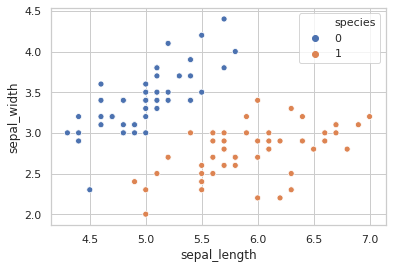

In [61]:
#visualization of given dataset
Iris1=Iris[Iris.species.isin([0,1])]
ax = sns.scatterplot(x=Iris1.iloc[:,0], y=Iris1.iloc[:,1], hue=Iris1.iloc[:,4])
plt.legend(ax[:2], ['first', 'second'],loc='best')

In [62]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [66]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [67]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

#randomnly select 80% of the indices under variable train_index and rest under test_index
test_index = np.array(list(set(range(len(X))) - set(train_index)))


In [68]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [73]:
# Define the min-max normalization function
def min_max_normalized(data): # we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
    c_max = np.max(data, axis=0)
    c_min = np.min(data, axis=0)
    return np.divide(data - c_min, c_max - c_min)

In [ ]:
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

In [74]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)

W = tf.Variable(tf.random_normal(shape=[4, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1])) #bias
#constructor for random initialization
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

AttributeError: module 'tensorflow' has no attribute 'random_normal'

In [20]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])#comment on the difference between tf.placeholder and tf.variable-----
'''
with tf.Variable you have to provide an initial value when you declare it. With tf.placeholder you don't have to provide an initial
value and you can specify it at run time with the feed_dict argument inside Session.run
'''
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [21]:
# Declare the 'model' you need to learn
model = tf.sigmoid(tf.matmul(data, W) + b)

In [22]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [75]:
# Define the learning rate， batch_size and number of iterations.
#learning_rate
lr=0.005
#batch_size---- #using batch makes the training ------?
batch_size=30
iter_num=1500
#iter_num

In [77]:
batch_index = np.random.randint(len(X),size=batch_size)
batch_index

array([  8, 131,  43,  89, 146,  94,  22, 106, 130,  64,  23, 123,  69,
        90,  29, 141,  94,  87,  72, 141, 124,  86, 112, 115,  28,  39,
       148,  47,  79, 119])

In [24]:
# Define the optimizer with name opt
opt = tf.train.GradientDescentOptimizer(lr)
# Define the goal
goal = opt.minimize(loss)

In [25]:

# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [26]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc=[]

In [28]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    #randomnly picks up up 30 sample data from the train_X
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    #Similarly store train accuracy value for current epoch using sess.run
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    # recode the results of loss and train accuracy
    #codesegment17---------------------
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))
#Write the command to calculate test accuracy:
temp_test_acc=np.sum(test_acc)/len(test_acc)
print("The test accuracy is: {:5f}".format(temp_test_acc))

epoch:  100 loss: 0.305716 train_acc: 0.862500
epoch:  200 loss: 0.144971 train_acc: 1.000000
epoch:  300 loss: 0.157285 train_acc: 1.000000
epoch:  400 loss: 0.150482 train_acc: 1.000000
epoch:  500 loss: 0.138670 train_acc: 1.000000
epoch:  600 loss: 0.112889 train_acc: 1.000000
epoch:  700 loss: 0.119393 train_acc: 1.000000
epoch:  800 loss: 0.128287 train_acc: 1.000000
epoch:  900 loss: 0.116138 train_acc: 1.000000
epoch: 1000 loss: 0.086197 train_acc: 1.000000
epoch: 1100 loss: 0.104485 train_acc: 1.000000
epoch: 1200 loss: 0.084130 train_acc: 1.000000
epoch: 1300 loss: 0.091043 train_acc: 1.000000
epoch: 1400 loss: 0.088923 train_acc: 1.000000
epoch: 1500 loss: 0.081059 train_acc: 1.000000
The test accuracy is: 1.000000


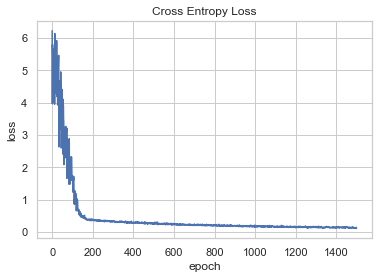

In [28]:
# Visualization of the results
# loss function
#codesegment19------------------------
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.show()

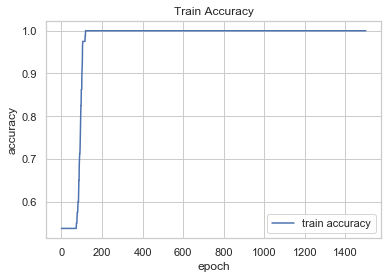

In [29]:
# plot for training accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()
plt.show()